# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
)

import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
 loan= pd.read_csv('/content/drive/MyDrive/Python_Course/P2/Loan_Modelling.csv')

In [5]:
data = loan.copy()

## Data Overview

* Observations
* Sanity checks

In [6]:
data.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [7]:
data.tail()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

Above are the first 5 and last 5 rows of the data.

In [8]:
data.shape

(5000, 14)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [10]:
data.describe().T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

In [11]:
missing_values = data.isnull().sum()
print(missing_values)

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64


There are no missing values in this data set.

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

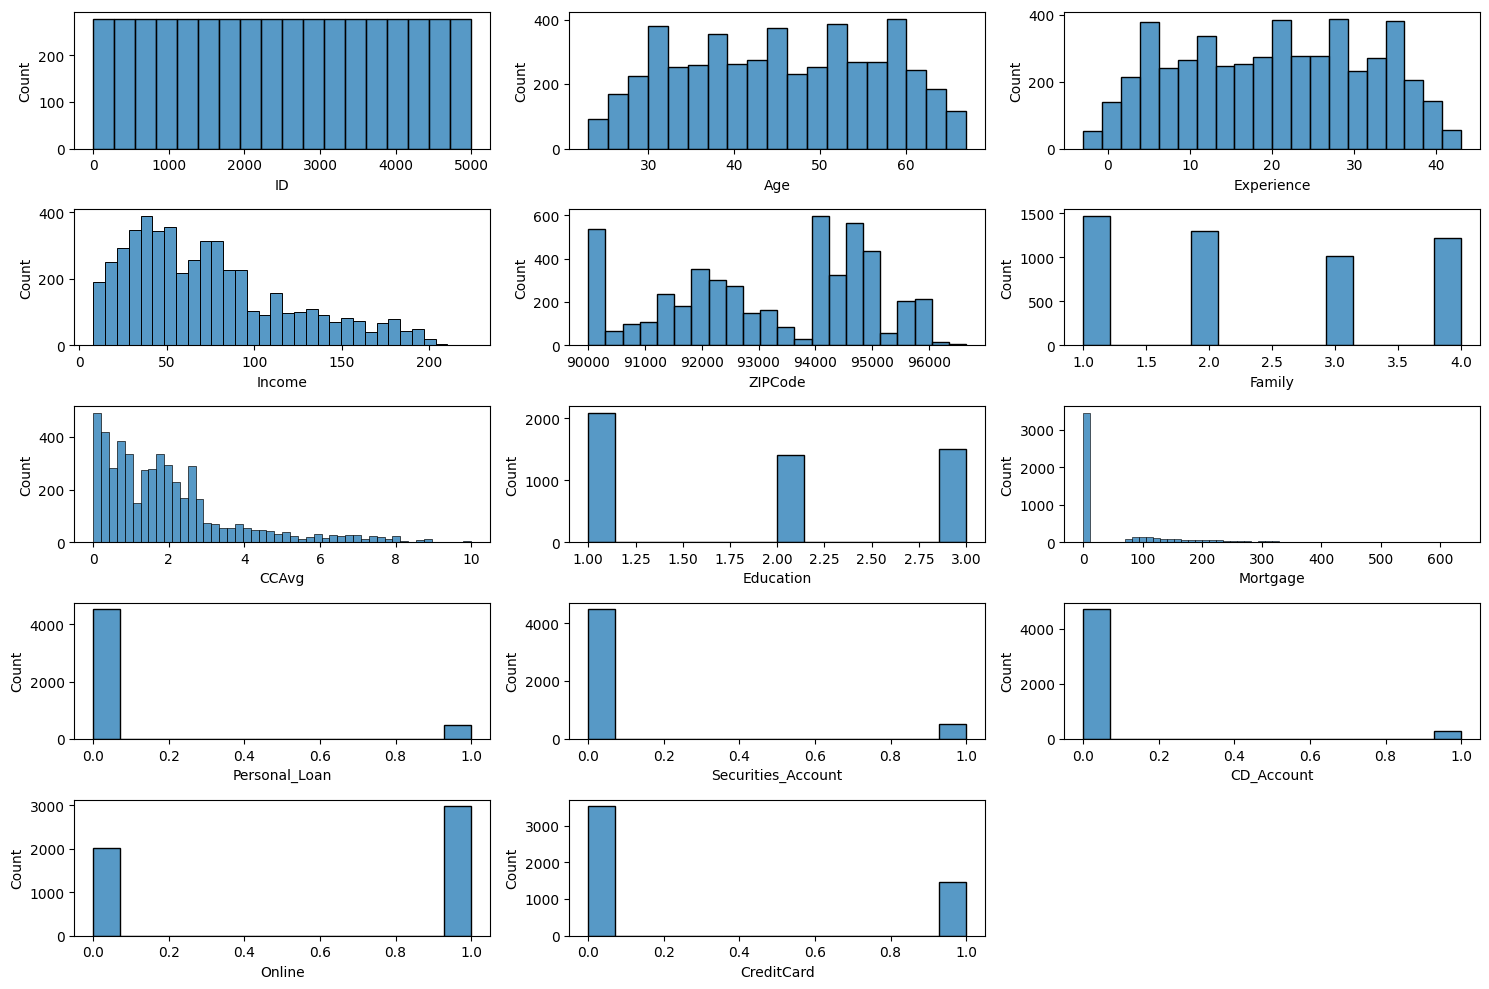

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

features = data.select_dtypes(include=['number']).columns.tolist()

n_features = len(features)
n_cols = 3
n_rows = -(-n_features // n_cols)

for i, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(data=data, x=feature)

plt.tight_layout()
plt.show()


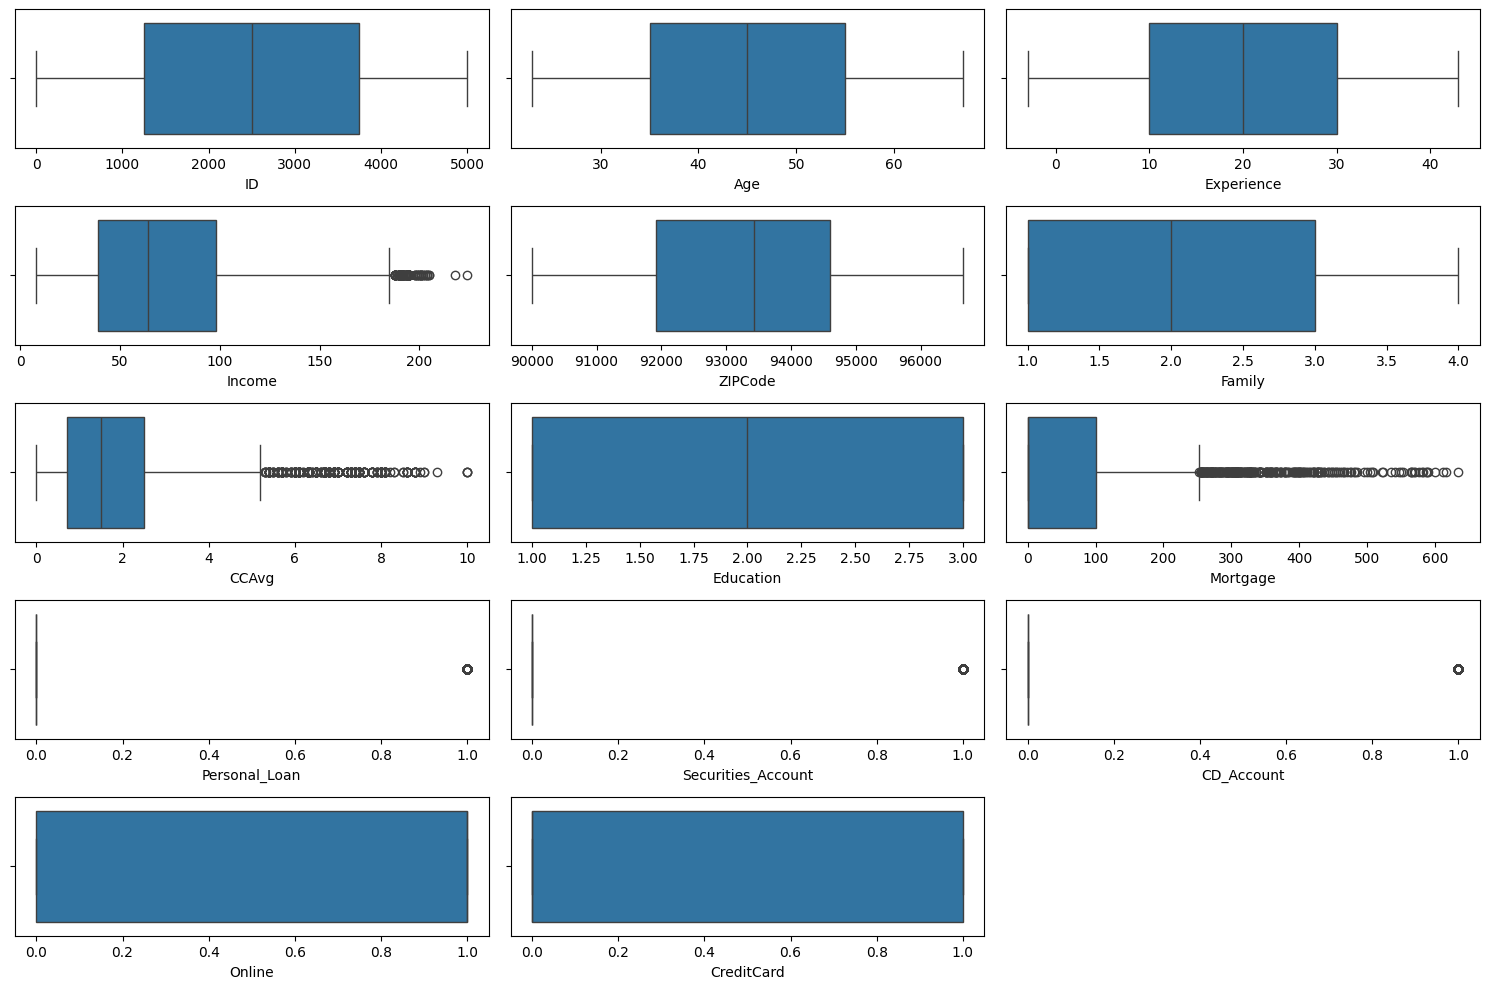

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the figure size
plt.figure(figsize=(15, 10))

# Define the list of numerical features to plot
features = data.select_dtypes(include=['number']).columns.tolist()

# Determine the number of rows and columns needed
n_features = len(features)
n_cols = 3  # Number of columns for subplots
n_rows = -(-n_features // n_cols)  # Calculate rows, equivalent to math.ceil(n_features / n_cols)

# Create the box plots
for i, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)  # Adjust subplot grid size
    sns.boxplot(data=data, x=feature)  # Plot the box plot

plt.tight_layout()  # Add spacing between plots
plt.show()



1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?


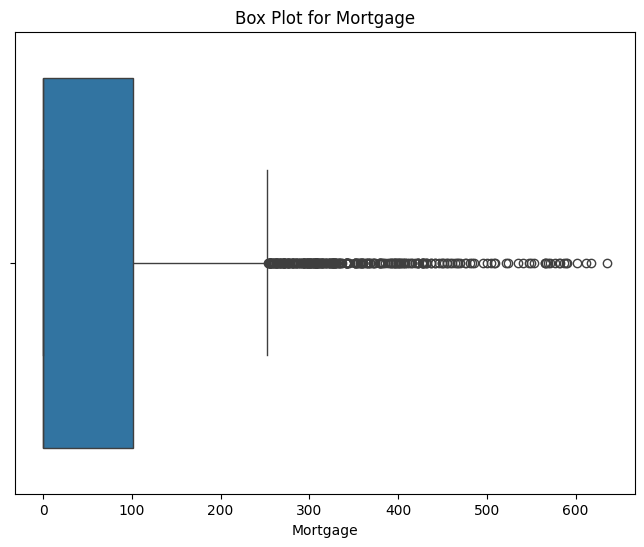

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Mortgage')  # Replace 'mortgage_amount' with your actual column name
plt.title('Box Plot for Mortgage')
plt.show()

<Axes: xlabel='Mortgage', ylabel='Count'>

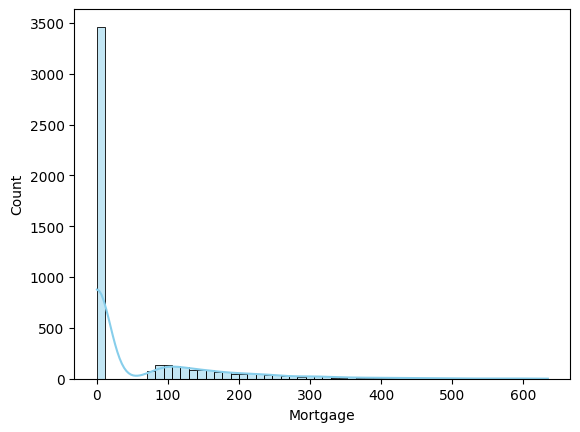

In [15]:
sns.histplot(data=data, x='Mortgage', kde=True, color='skyblue')  # Histogram with KDE (Kernel Density Estimate)


More than half seem to have no Mortgage

### Q2) How many customers have credit cards?


In [16]:
data.CreditCard.value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

1470 customers have credit cards.

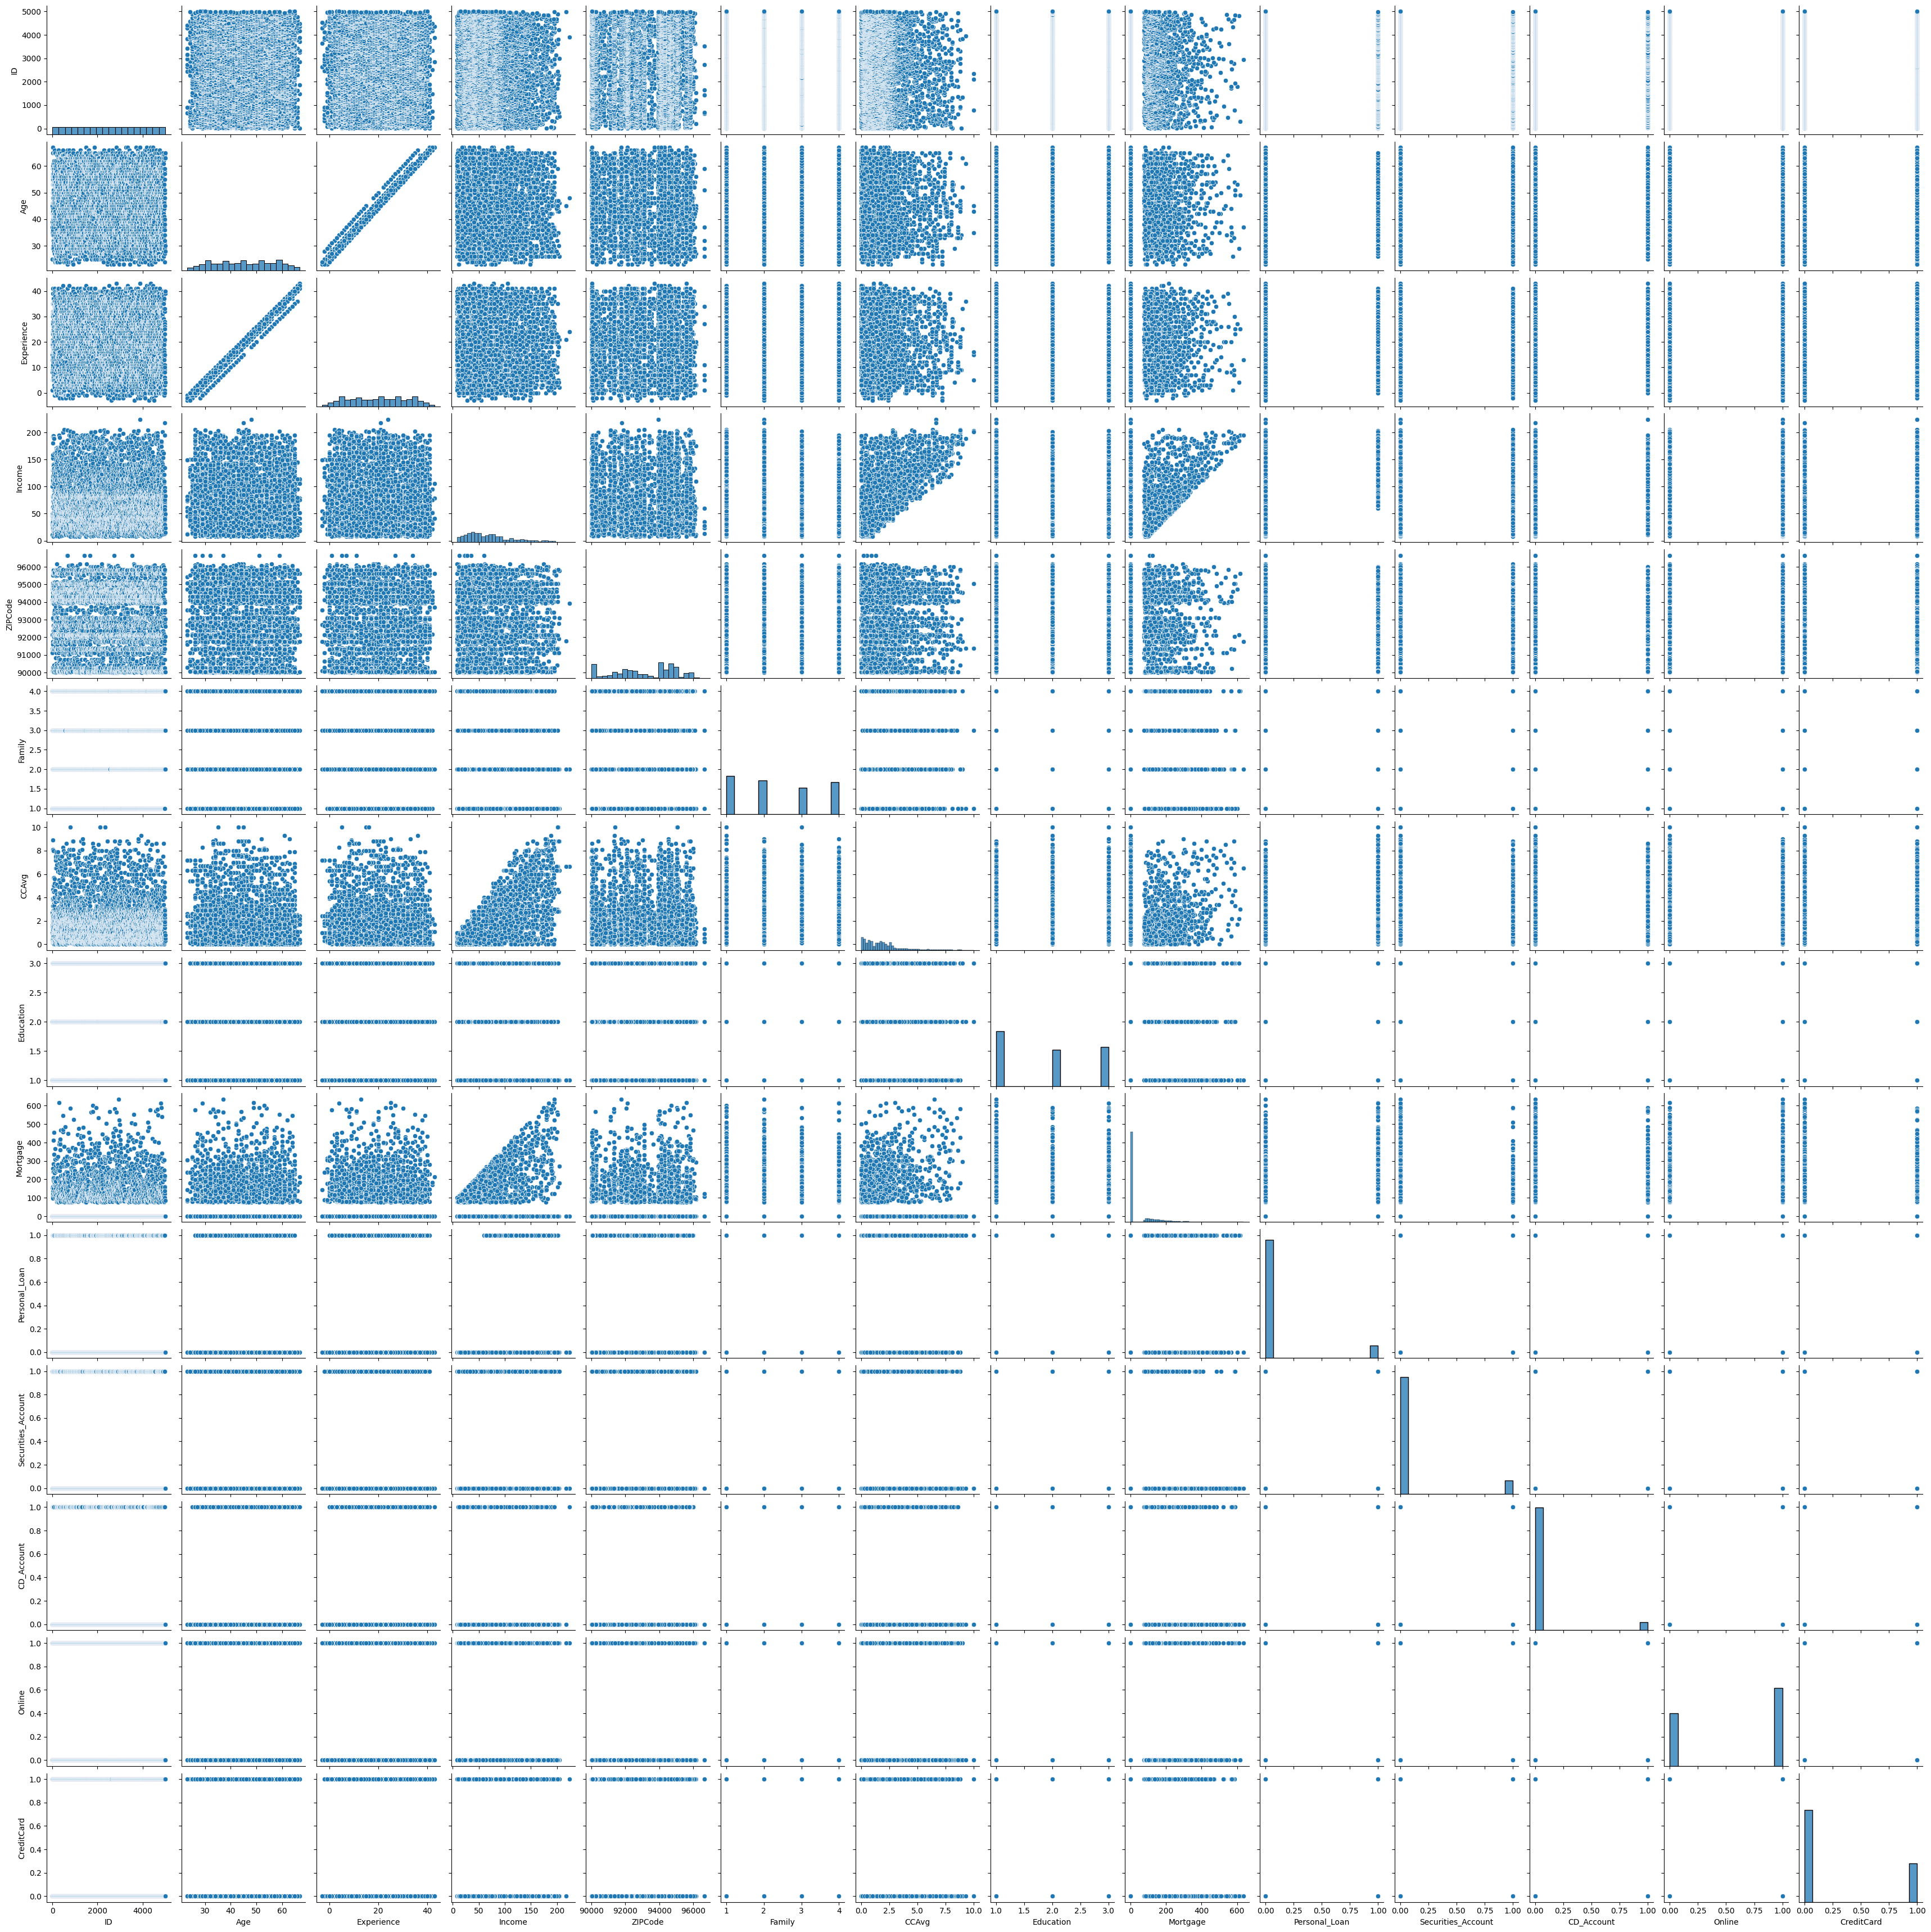

In [17]:
sns.pairplot(data);

Q3)What are the attributes that have a strong correlation with the target

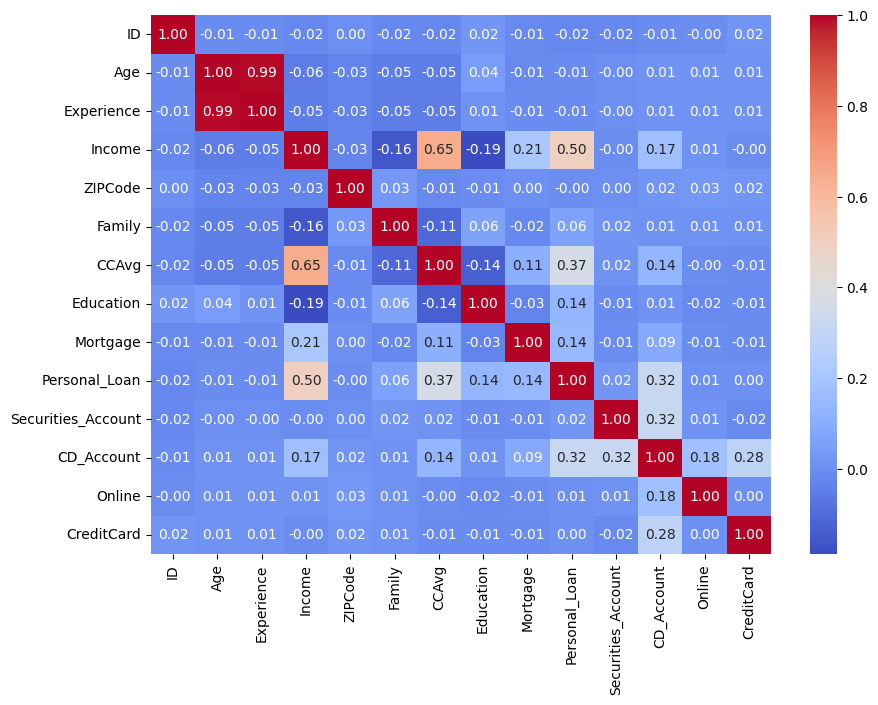

In [18]:
# defining the figure size
plt.figure(figsize=(10, 7))

# plotting the correlation heatmap
sns.heatmap(data.corr(numeric_only = True), annot=True, fmt='0.2f', cmap='coolwarm');

Income , CCAvg, CD_Account

Q4) How does a customer's interest in purchasing a loan vary with their age?


Customer Interest in Loans by Age Group
------------------------------------------------------------
Age Group: 20-29, Interest Rate: 0.10
Age Group: 30-39, Interest Rate: 0.10
Age Group: 40-49, Interest Rate: 0.09
Age Group: 50-59, Interest Rate: 0.09
Age Group: 60-69, Interest Rate: 0.10


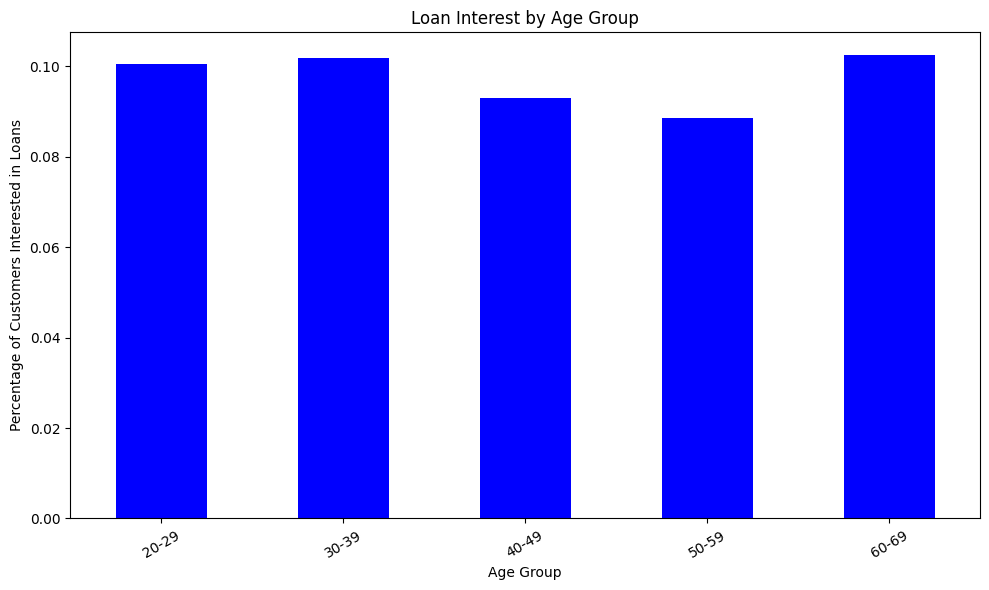

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Define age intervals and corresponding group names
age_intervals = [20, 30, 40, 50, 60, 70]
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69']

# Categorize the 'Age' column into the defined age groups
data['Age_Category'] = pd.cut(data['Age'], bins=age_intervals, labels=age_labels, right=False)

# Calculate the percentage of customers interested in loans within each age category
loan_interest_by_age_group = data.groupby('Age_Category')['Personal_Loan'].mean()

# Display the interest in loans by age group
print("Customer Interest in Loans by Age Group")
print("-" * 60)
for group, interest in loan_interest_by_age_group.items():
    print(f"Age Group: {group}, Interest Rate: {interest:.2f}")

# Generate a bar chart to visualize the data
plt.figure(figsize=(10, 6))
loan_interest_by_age_group.plot(kind='bar', color='blue')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Customers Interested in Loans')
plt.title('Loan Interest by Age Group')
plt.xticks(rotation=30)  # Adjust x-axis label rotation for better viewing
plt.tight_layout()       # Ensure labels and title fit well
plt.show()


Q5 )How does a customer's interest in purchasing a loan vary with their education?

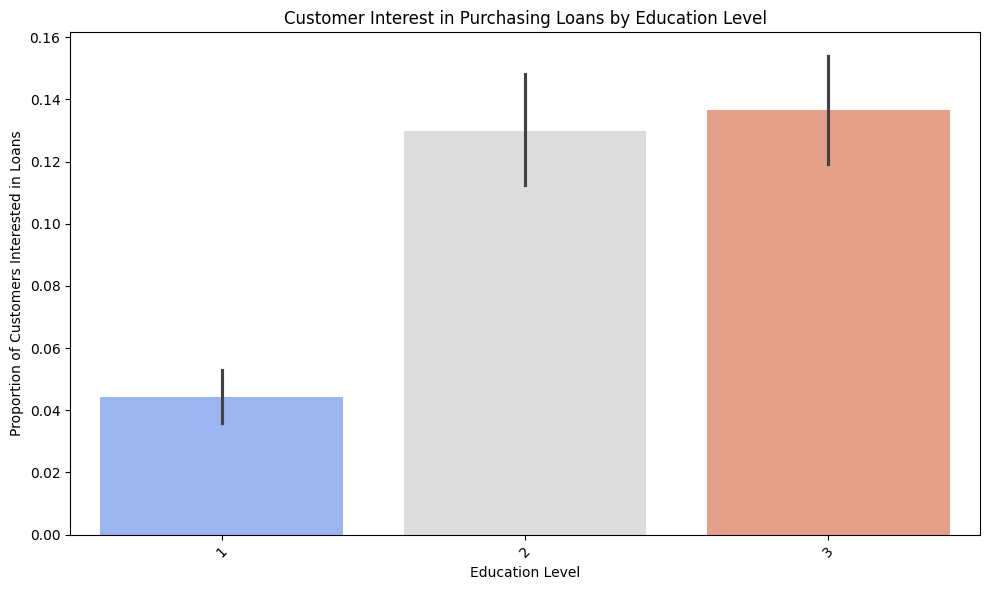

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Education', y='Personal_Loan', data=data, estimator=lambda x: x.mean(), palette='coolwarm')

# Set the labels and title for the plot
plt.xlabel('Education Level')
plt.ylabel('Proportion of Customers Interested in Loans')
plt.title('Customer Interest in Purchasing Loans by Education Level')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()       # Adjust layout for better fitting

# Display the plot
plt.show()

People with higher education levels seem to be more interested in loans

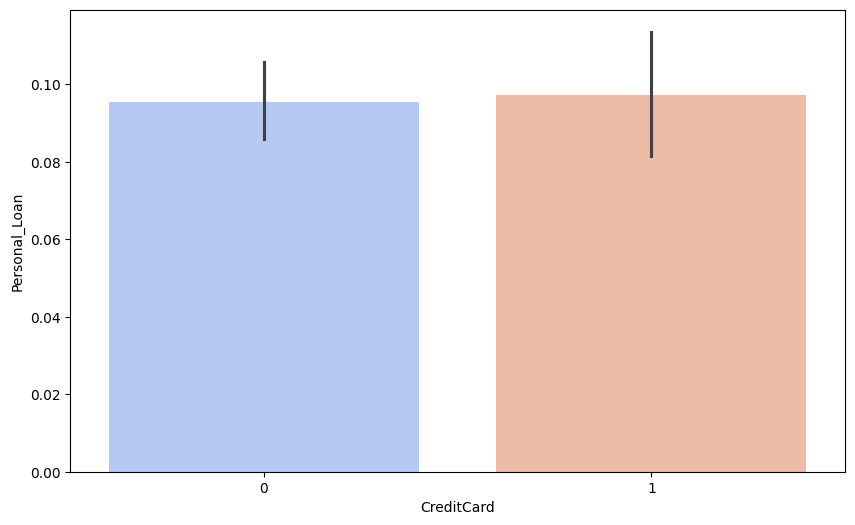

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x='CreditCard', y='Personal_Loan', data=data, estimator=lambda x: x.mean(), palette='coolwarm')
plt.show()

Having a credit card or not doe snot seem to affect Personal loan

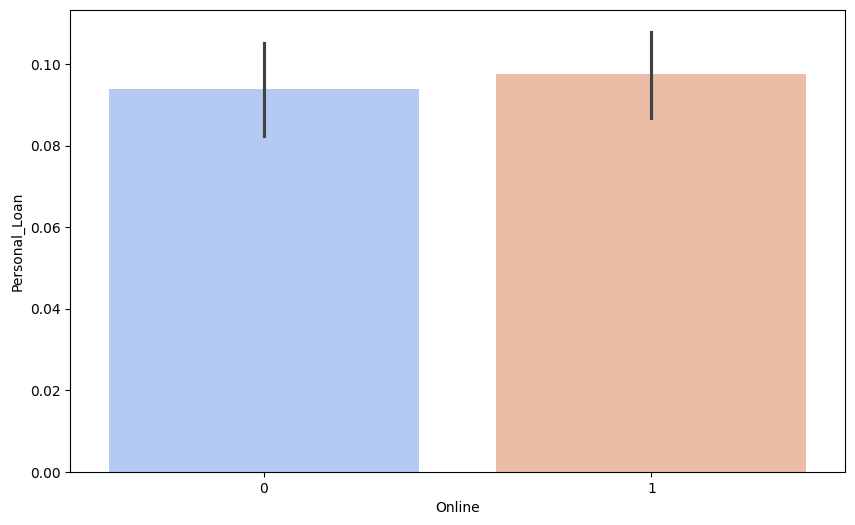

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Online', y='Personal_Loan', data=data, estimator=lambda x: x.mean(), palette='coolwarm')
plt.show()

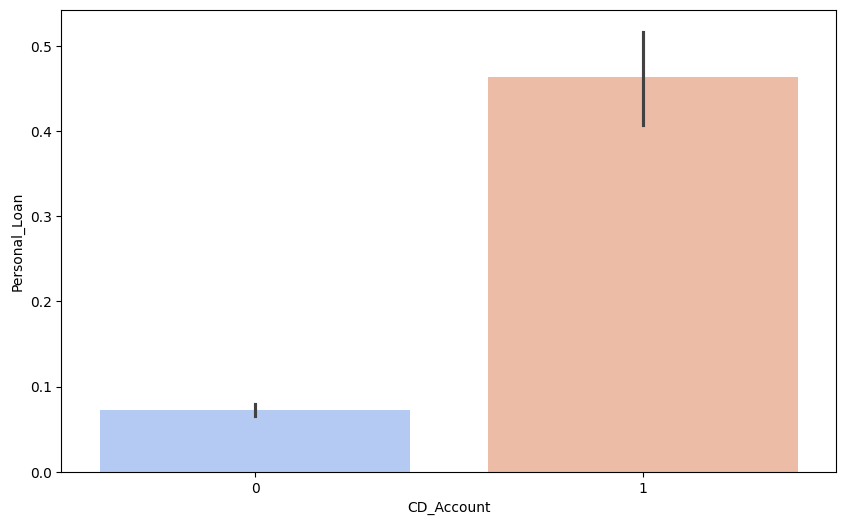

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x='CD_Account', y='Personal_Loan', data=data, estimator=lambda x: x.mean(), palette='coolwarm')
plt.show()

People who have a cd_account are more likely to accept personal_loan

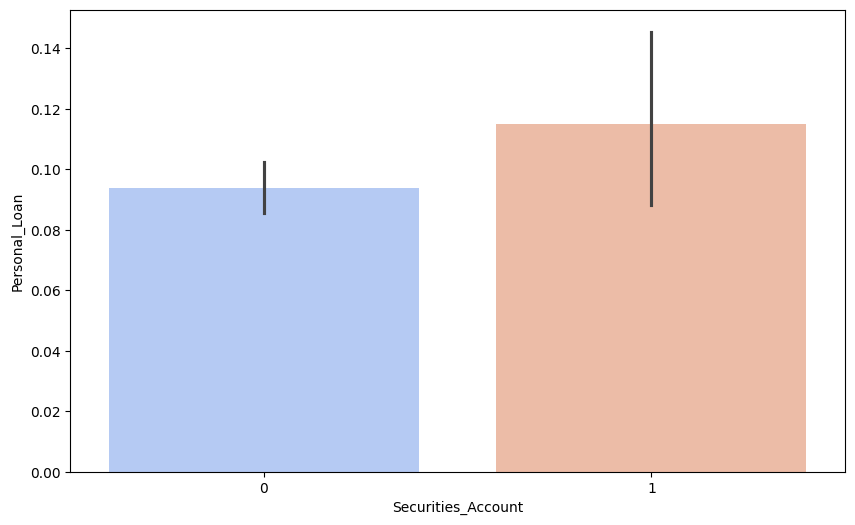

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Securities_Account', y='Personal_Loan', data=data, estimator=lambda x: x.mean(), palette='coolwarm')
plt.show()

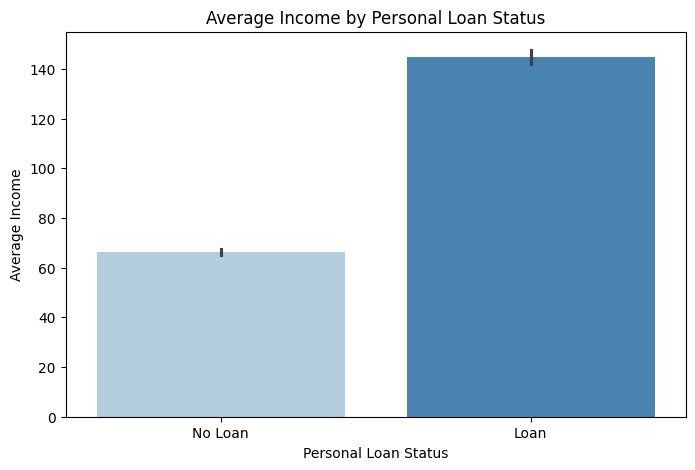

In [25]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Personal_Loan', y='Income', data=data, estimator=lambda x: x.mean(), palette='Blues')

plt.xlabel('Personal Loan Status')
plt.ylabel('Average Income')
plt.title('Average Income by Personal Loan Status')
plt.xticks([0, 1], ['No Loan', 'Loan'])  # Labeling the x-axis for clarity
plt.show()


The Avergage income of people who took a loan is higher than those who dont.

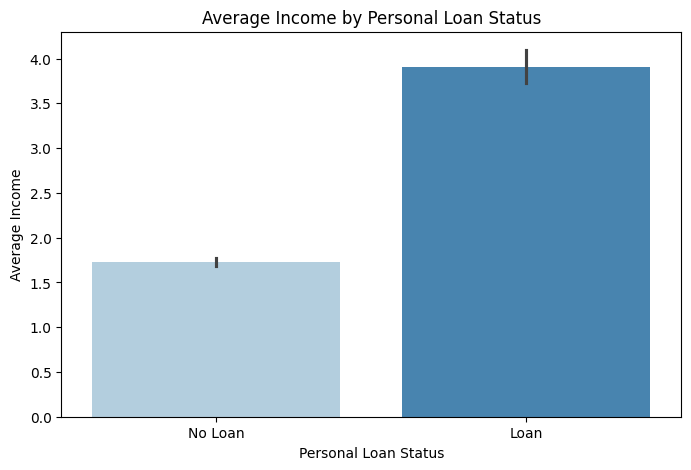

In [26]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Personal_Loan', y='CCAvg', data=data, estimator=lambda x: x.mean(), palette='Blues')

plt.xlabel('Personal Loan Status')
plt.ylabel('Average Income')
plt.title('Average Income by Personal Loan Status')
plt.xticks([0, 1], ['No Loan', 'Loan'])  # Labeling the x-axis for clarity
plt.show()


## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [27]:
data["Experience"].unique()


array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

In [28]:
# checking for experience <0
data[data["Experience"] < 0]["Experience"].unique()

array([-1, -2, -3])

In [29]:
# Correcting the experience values
data["Experience"].replace(-1, 1, inplace=True)
data["Experience"].replace(-2, 2, inplace=True)
data["Experience"].replace(-3, 3, inplace=True)

In [30]:
data["Education"].unique()


array([1, 2, 3])

In [31]:
# checking the number of uniques in the zip code
data["ZIPCode"].nunique()

467

In [32]:
data["ZIPCode"] = data["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    data["ZIPCode"].str[0:2].nunique(),
)
data["ZIPCode"] = data["ZIPCode"].str[0:2]

data["ZIPCode"] = data["ZIPCode"].astype("category")

Number of unique values if we take first two digits of ZIPCode:  7


In [33]:
# Find the the outliers with Interquartile Range (IQR).
# Select only numerical columns
numerical_data = data.select_dtypes(include=['float64', 'int64'])

Q1 = numerical_data.quantile(0.25)
Q3 = numerical_data.quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
((numerical_data < lower) | (numerical_data > upper)).sum() / len(numerical_data) * 100

ID                     0.00
Age                    0.00
Experience             0.00
Income                 1.92
Family                 0.00
CCAvg                  6.48
Education              0.00
Mortgage               5.82
Personal_Loan          9.60
Securities_Account    10.44
CD_Account             6.04
Online                 0.00
CreditCard             0.00
dtype: float64

In [34]:
# Find the the outliers with Interquartile Range (IQR).
# Select only numerical columns
numerical_data = data.select_dtypes(include=['float64', 'int64'])

Q1 = numerical_data.quantile(0.25)
Q3 = numerical_data.quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
((numerical_data < lower) | (numerical_data > upper)).sum() / len(numerical_data) * 100

ID                     0.00
Age                    0.00
Experience             0.00
Income                 1.92
Family                 0.00
CCAvg                  6.48
Education              0.00
Mortgage               5.82
Personal_Loan          9.60
Securities_Account    10.44
CD_Account             6.04
Online                 0.00
CreditCard             0.00
dtype: float64

In [35]:
# dropping Experience as it is perfectly correlated with Age
X = data.drop(["Personal_Loan", "Experience"], axis=1)
Y = data["Personal_Loan"]

X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [36]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))


Shape of Training set :  (3500, 19)
Shape of test set :  (1500, 19)
Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


## Model Building

### Model Evaluation Criterion

*


In [37]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf


In [38]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building

In [39]:
# Encode categorical variables using one-hot encoding.
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Ensure the training and test sets have the same columns after encoding.
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)



In [40]:
# Check for NaN values
print(X_train_encoded.isnull().sum().sum())  # Should print 0 if there are no NaN values
print(X_test_encoded.isnull().sum().sum())   # Should print 0 if there are no NaN values

# If there are NaN values, you can fill them (though they shouldn't be any after the align step):
X_train_encoded = X_train_encoded.fillna(0)
X_test_encoded = X_test_encoded.fillna(0)


0
0


In [41]:
# Ensure all columns are numeric
print(X_train_encoded.dtypes)  # Should show all columns as int64 or float64
print(X_test_encoded.dtypes)   # Should show all columns as int64 or float64


ID                      int64
Age                     int64
Income                  int64
Family                  int64
CCAvg                 float64
Mortgage                int64
Securities_Account      int64
CD_Account              int64
Online                  int64
CreditCard              int64
ZIPCode_91              uint8
ZIPCode_92              uint8
ZIPCode_93              uint8
ZIPCode_94              uint8
ZIPCode_95              uint8
ZIPCode_96              uint8
Education_2             uint8
Education_3             uint8
Age_Category_20-29      uint8
Age_Category_30-39      uint8
Age_Category_40-49      uint8
Age_Category_50-59      uint8
Age_Category_60-69      uint8
dtype: object
ID                      int64
Age                     int64
Income                  int64
Family                  int64
CCAvg                 float64
Mortgage                int64
Securities_Account      int64
CD_Account              int64
Online                  int64
CreditCard              in

In [42]:
# Drop redundant columns
X_train_encoded = X_train_encoded.loc[:, ~X_train_encoded.columns.duplicated()]
X_test_encoded = X_test_encoded.loc[:, ~X_test_encoded.columns.duplicated()]


In [43]:
# Verify column consistency
if set(X_train_encoded.columns) != set(X_test_encoded.columns):
    raise ValueError("Training and test datasets have different columns.")


In [44]:
# Fit the model
dtree1 = DecisionTreeClassifier(random_state=42)    # random_state sets a seed value and enables reproducibility
dtree1.fit(X_train_encoded, y_train)


DecisionTreeClassifier(random_state=42)

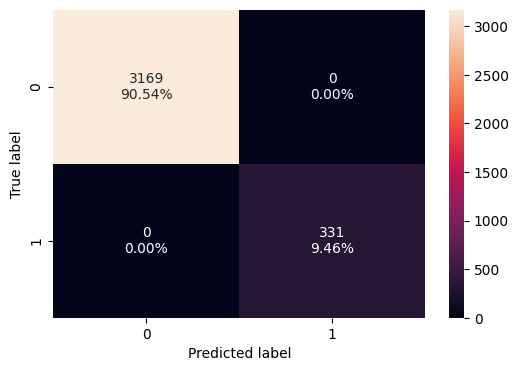

In [45]:
confusion_matrix_sklearn(dtree1, X_train_encoded, y_train)

In [46]:
dtree1_train_perf = model_performance_classification_sklearn(
    dtree1, X_train_encoded, y_train
)
dtree1_train_perf

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

In [50]:
dtree1_test_perf = model_performance_classification_sklearn(
    dtree1, X_test_encoded, y_test
)
dtree1_test_perf

Accuracy    Recall  Precision        F1
0  0.981333  0.892617   0.917241  0.904762

In [90]:
feature_names = list(X_train_encoded.columns)
print(feature_names)

['ID', 'Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_2', 'Education_3', 'Age_Category_20-29', 'Age_Category_30-39', 'Age_Category_40-49', 'Age_Category_50-59', 'Age_Category_60-69']


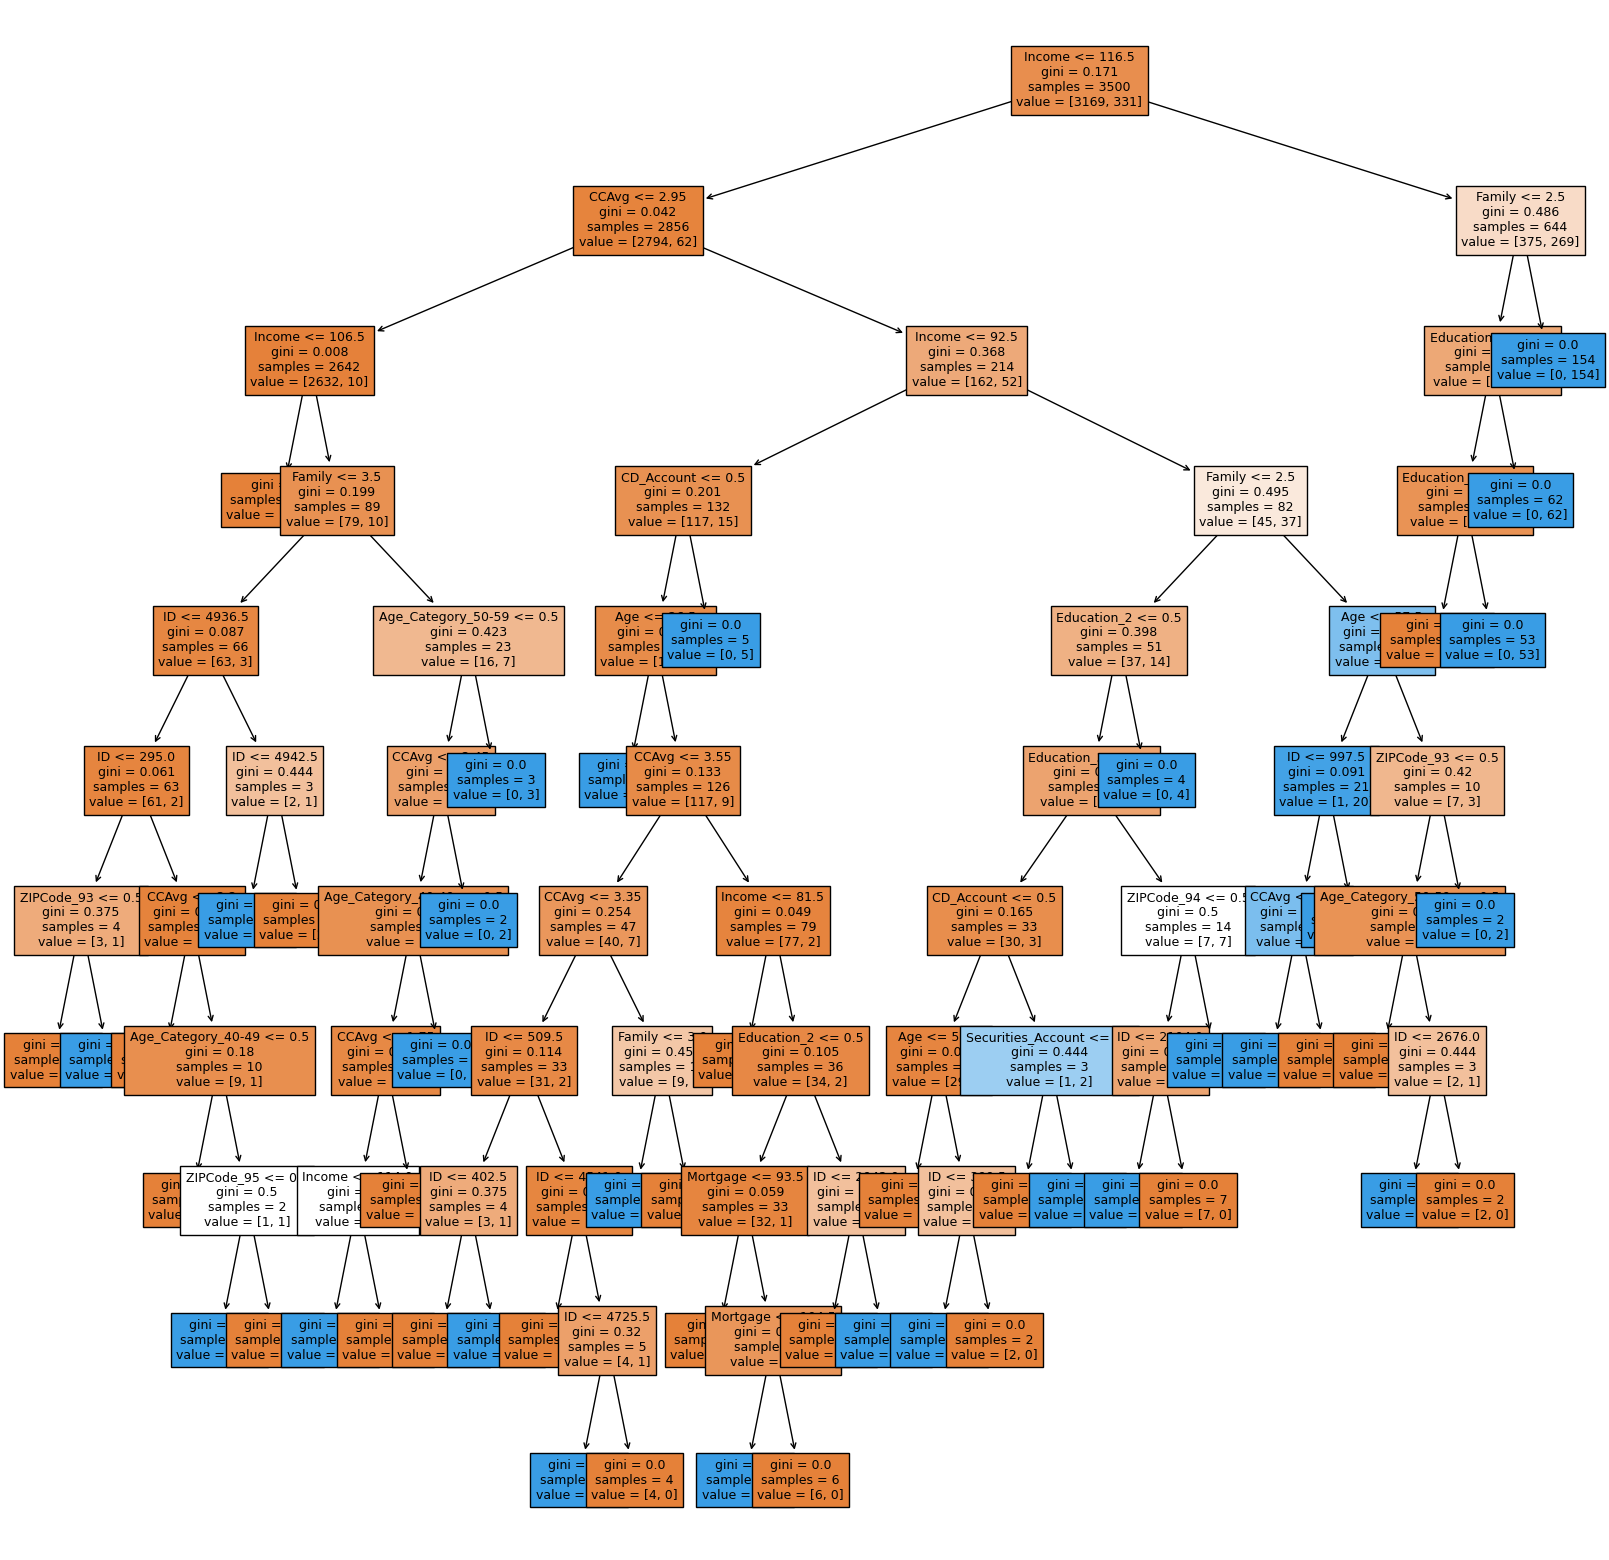

In [91]:
# list of feature names in X_train
feature_names = list(X_train_encoded.columns)

# set the figure size for the plot
plt.figure(figsize=(20, 20))

# plotting the decision tree
out = tree.plot_tree(
    dtree1,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

### Model Performance Improvement

### Pre-pruning

In [92]:
# define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 11, 2)
max_leaf_nodes_values = np.arange(10, 51, 10)
min_samples_split_values = np.arange(10, 51, 10)

# initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')

# iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                random_state=42
            )

            # fit the model to the training data
            estimator.fit(X_train_encoded, y_train)

            # make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train_encoded)
            y_test_pred = estimator.predict(X_test_encoded)

            # calculate F1 scores for training and test sets
            train_f1_score = f1_score(y_train, y_train_pred)
            test_f1_score = f1_score(y_test, y_test_pred)

            # calculate the absolute difference between training and test F1 scores
            score_diff = abs(train_f1_score - test_f1_score)

            # update the best estimator and best score if the current one has a smaller score difference
            if score_diff < best_score_diff:
                best_score_diff = score_diff
                best_estimator = estimator

In [93]:
# creating an instance of the best model
dtree2 = best_estimator

# fitting the best model to the training data
dtree2.fit(X_train_encoded, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=20, min_samples_split=40,
                       random_state=42)

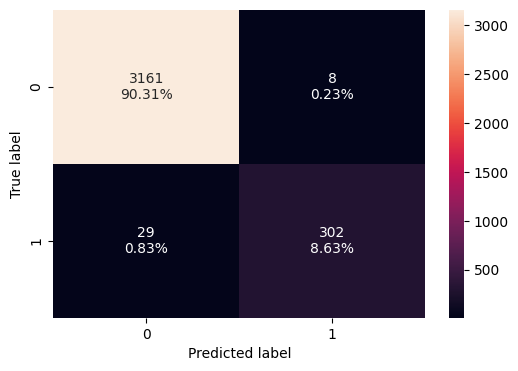

In [94]:
confusion_matrix_sklearn(dtree2, X_train_encoded, y_train)

In [95]:
dtree2_train_perf = model_performance_classification_sklearn(
    dtree2, X_train_encoded, y_train
)
dtree2_train_perf

Accuracy    Recall  Precision        F1
0  0.989429  0.912387   0.974194  0.942278

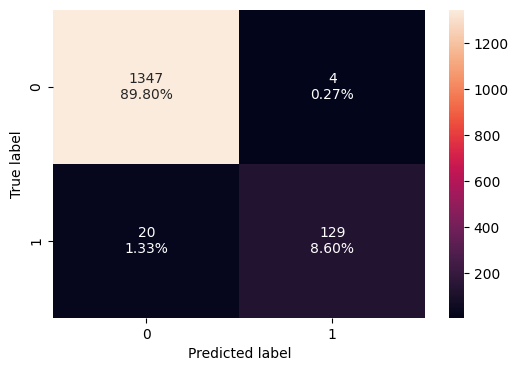

In [96]:
confusion_matrix_sklearn(dtree2, X_test_encoded, y_test)

In [97]:

dtree2_test_perf = model_performance_classification_sklearn(
    dtree2, X_test_encoded, y_test
)
dtree2_test_perf

Accuracy    Recall  Precision        F1
0     0.984  0.865772   0.969925  0.914894

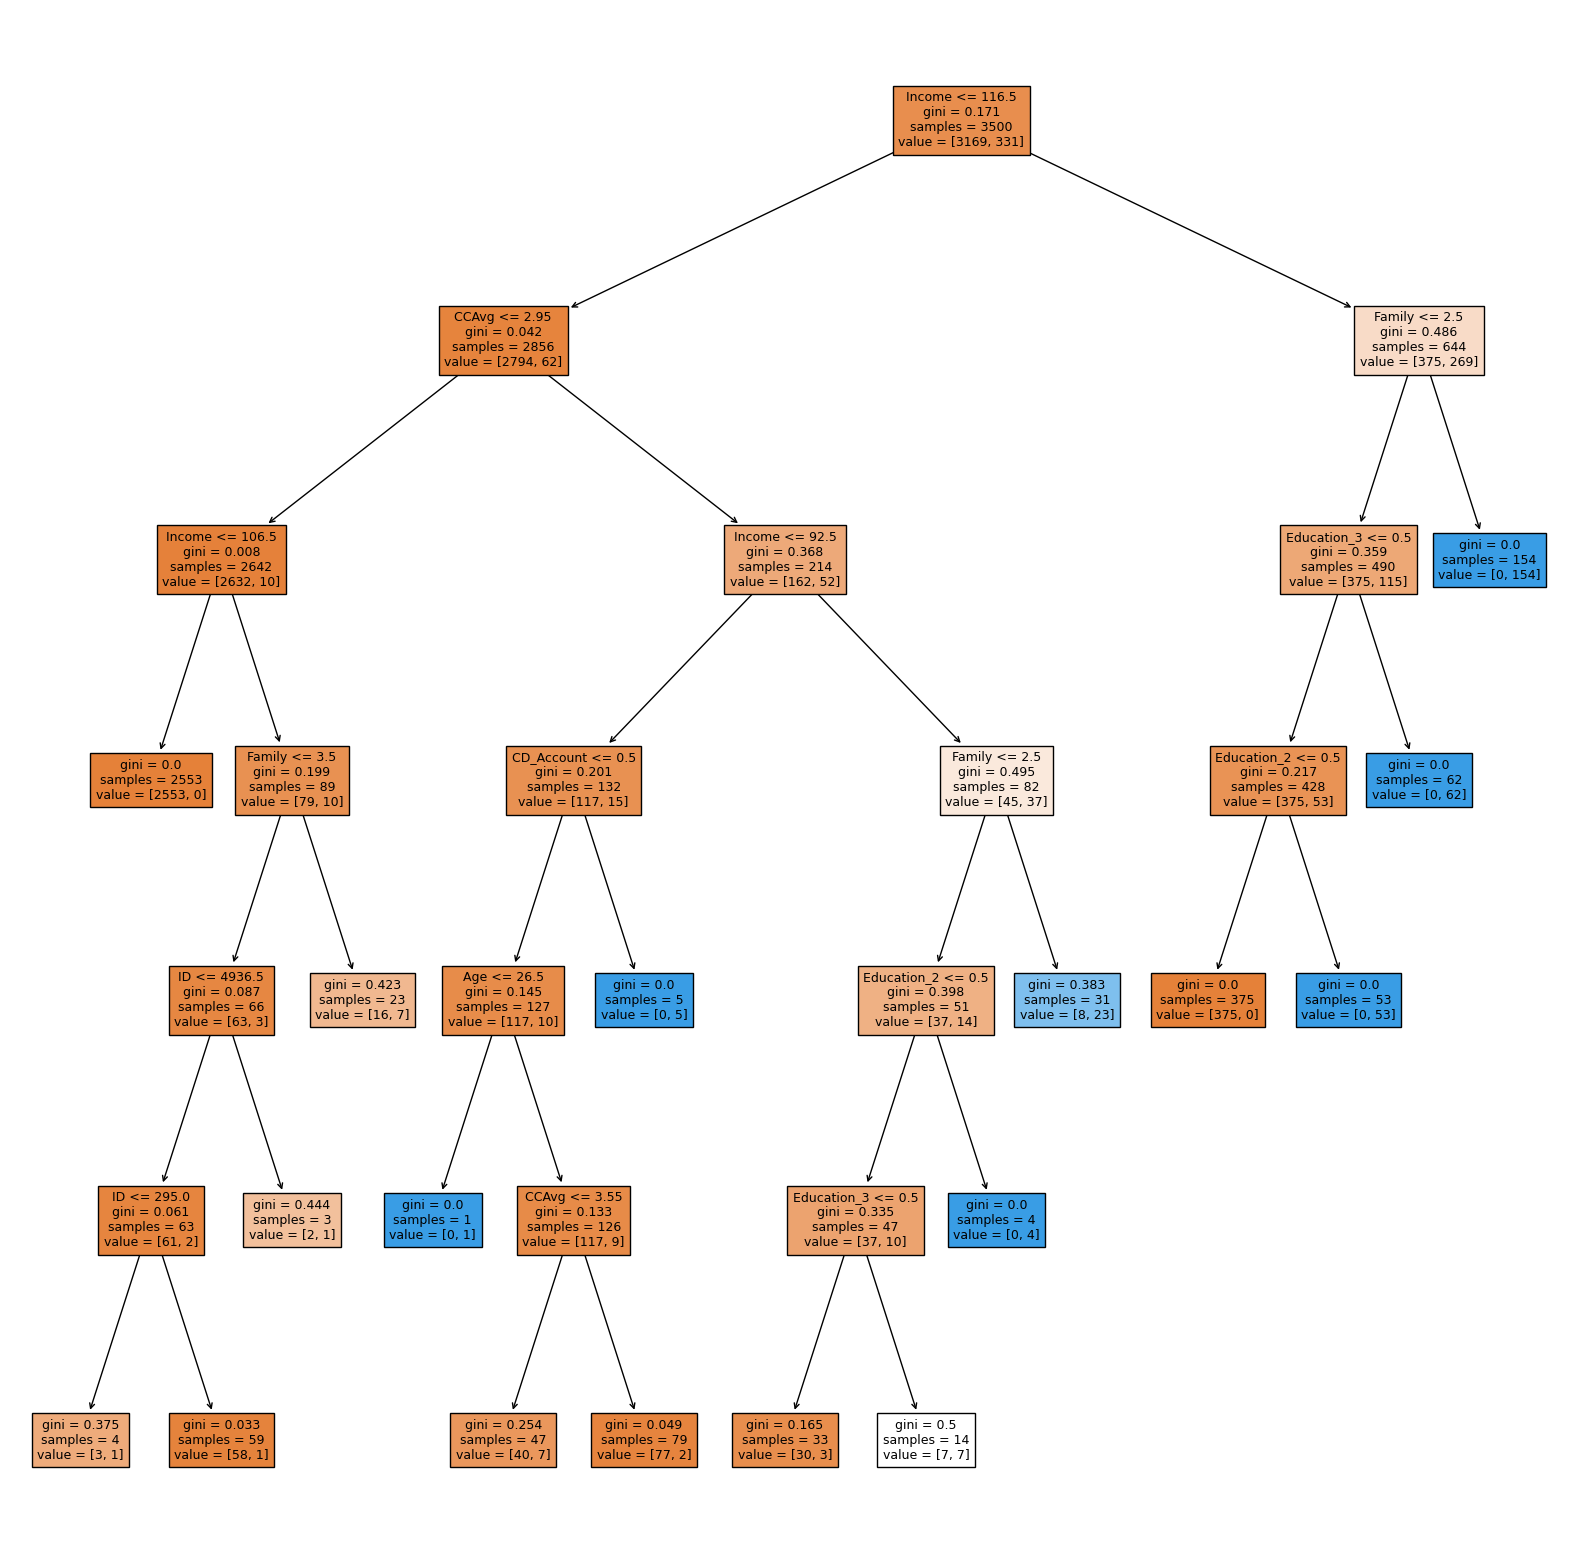

In [98]:
# list of feature names in X_train
feature_names = list(X_train_encoded.columns)

# set the figure size for the plot
plt.figure(figsize=(20, 20))

# plotting the decision tree
out = tree.plot_tree(
    dtree2,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

In [99]:
# printing a text report showing the rules of a decision tree
print(
    tree.export_text(
        dtree2,    # specify the model
        feature_names=feature_names,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ID <= 4936.50
|   |   |   |   |   |--- ID <= 295.00
|   |   |   |   |   |   |--- weights: [3.00, 1.00] class: 0
|   |   |   |   |   |--- ID >  295.00
|   |   |   |   |   |   |--- weights: [58.00, 1.00] class: 0
|   |   |   |   |--- ID >  4936.50
|   |   |   |   |   |--- weights: [2.00, 1.00] class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- weights: [16.00, 7.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- Age >  26.50
|   |   |   |   |   |--- CCAvg <= 3.55
|   |   |   |   |   |   |--- weights: [40.00, 7.00] class: 0
|   |   |   |   |   |--- CCAvg >  3.55
|   |   |   |   |   |   |--- weights: [77.00, 2.00] c

### Post pruning

In [100]:
# Create an instance of the decision tree model
clf = DecisionTreeClassifier(random_state=42)

# Compute the cost complexity pruning path for the model using the training data
path = clf.cost_complexity_pruning_path(X_train_encoded, y_train)

# Extract the array of effective alphas from the pruning path
ccp_alphas = abs(path.ccp_alphas)

# Extract the array of total impurities at each alpha along the pruning path
impurities = path.impurities

In [101]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000    0.000000
1     0.000187    0.000562
2     0.000223    0.001676
3     0.000250    0.002176
4     0.000268    0.003249
5     0.000269    0.004324
6     0.000269    0.004862
7     0.000272    0.005406
8     0.000276    0.005958
9     0.000381    0.006339
10    0.000478    0.006817
11    0.000625    0.007442
12    0.000700    0.008142
13    0.000760    0.011183
14    0.000769    0.014260
15    0.000889    0.015149
16    0.001026    0.017200
17    0.001305    0.018505
18    0.001647    0.020153
19    0.002333    0.022486
20    0.002407    0.024893
21    0.003294    0.028187
22    0.006473    0.034659
23    0.025146    0.084951
24    0.039216    0.124167
25    0.047088    0.171255

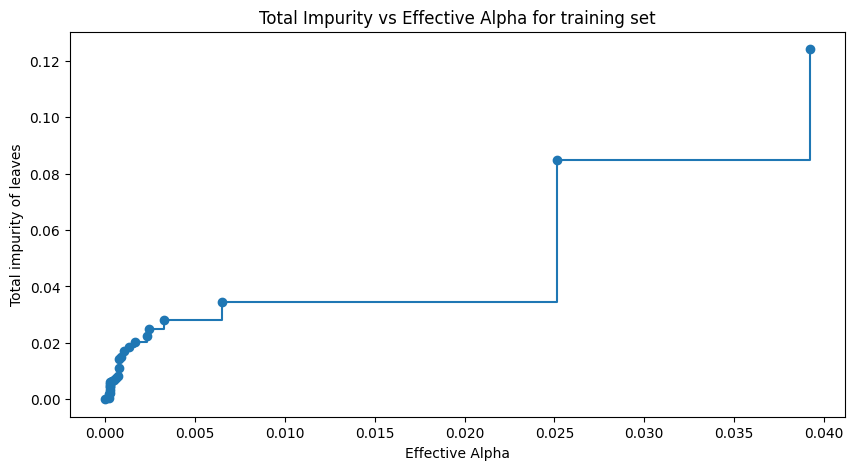

In [102]:
# Create a figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the total impurities versus effective alphas, excluding the last value,
# using markers at each data point and connecting them with steps
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")

# Set the x-axis label
ax.set_xlabel("Effective Alpha")

# Set the y-axis label
ax.set_ylabel("Total impurity of leaves")

# Set the title of the plot
ax.set_title("Total Impurity vs Effective Alpha for training set");

In [72]:
# Initialize an empty list to store the decision tree classifiers
clfs = []

# Iterate over each ccp_alpha value extracted from cost complexity pruning path
for ccp_alpha in ccp_alphas:
    # Create an instance of the DecisionTreeClassifier
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=42)

    # Fit the classifier to the training data
    clf.fit(X_train_encoded, y_train)

    # Append the trained classifier to the list
    clfs.append(clf)

# Print the number of nodes in the last tree along with its ccp_alpha value
print(
    "Number of nodes in the last tree is {} with ccp_alpha {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is 1 with ccp_alpha 0.04708834100596766


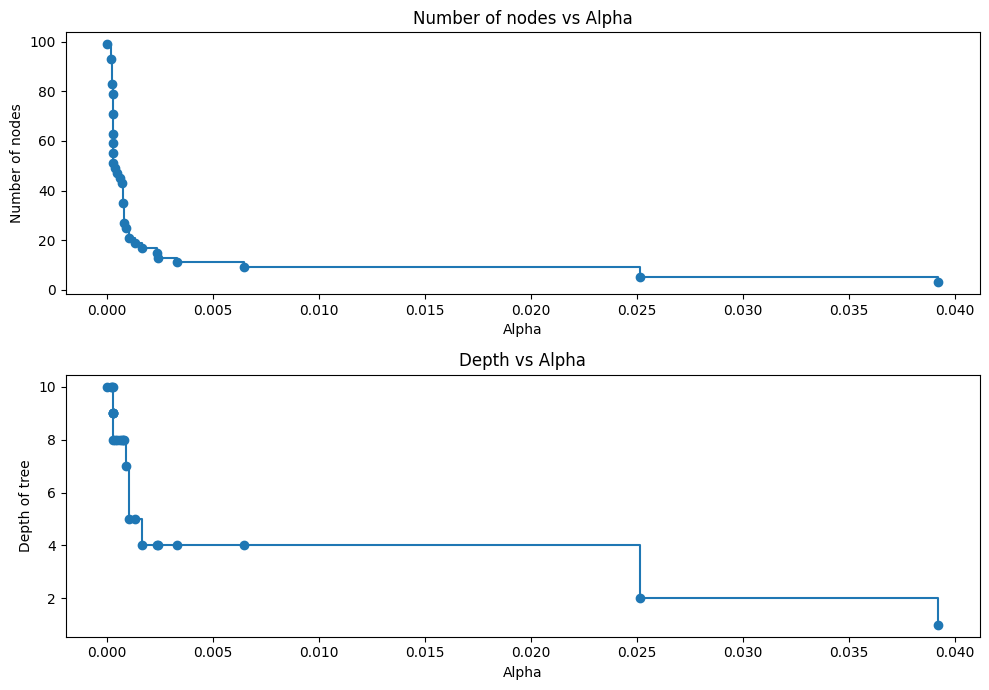

In [73]:
# Remove the last classifier and corresponding ccp_alpha value from the lists
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Extract the number of nodes in each tree classifier
node_counts = [clf.tree_.node_count for clf in clfs]

# Extract the maximum depth of each tree classifier
depth = [clf.tree_.max_depth for clf in clfs]

# Create a figure and a set of subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 7))

# Plot the number of nodes versus ccp_alphas on the first subplot
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("Alpha")
ax[0].set_ylabel("Number of nodes")
ax[0].set_title("Number of nodes vs Alpha")

# Plot the depth of tree versus ccp_alphas on the second subplot
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Depth of tree")
ax[1].set_title("Depth vs Alpha")

# Adjust the layout of the subplots to avoid overlap
fig.tight_layout()

In [74]:
train_f1_scores = []  # Initialize an empty list to store F1 scores for training set for each decision tree classifier

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    # Predict labels for the training set using the current decision tree classifier
    pred_train = clf.predict(X_train_encoded)

    # Calculate the F1 score for the training set predictions compared to true labels
    f1_train = f1_score(y_train, pred_train)

    # Append the calculated F1 score to the train_f1_scores list
    train_f1_scores.append(f1_train)

In [77]:
test_f1_scores = []  # Initialize an empty list to store F1 scores for test set for each decision tree classifier

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    # Predict labels for the test set using the current decision tree classifier
    pred_test = clf.predict(X_test_encoded)

    # Calculate the F1 score for the test set predictions compared to true labels
    f1_test = f1_score(y_test, pred_test)

    # Append the calculated F1 score to the test_f1_scores list
    test_f1_scores.append(f1_test)

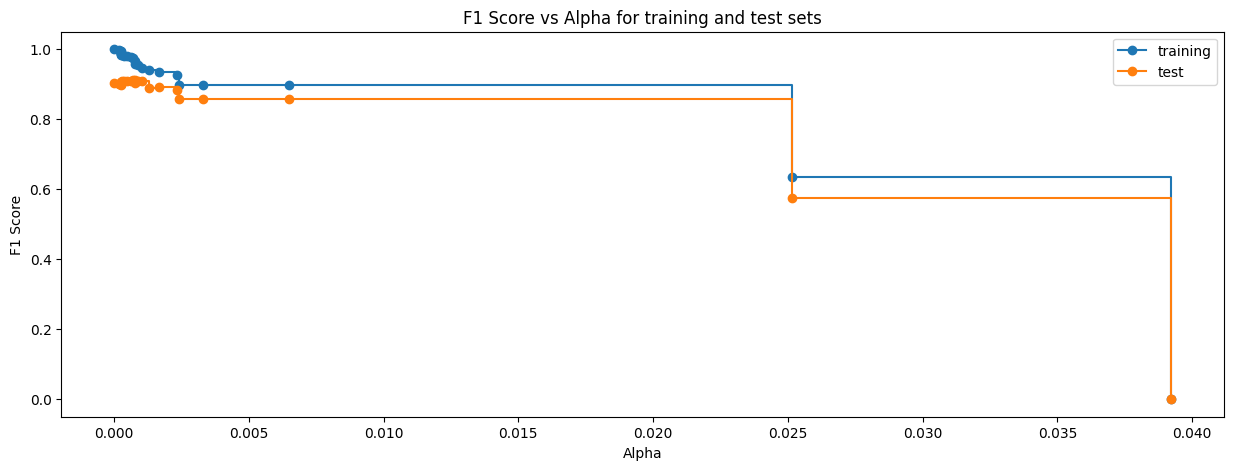

In [78]:
# Create a figure
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("Alpha")  # Set the label for the x-axis
ax.set_ylabel("F1 Score")  # Set the label for the y-axis
ax.set_title("F1 Score vs Alpha for training and test sets")  # Set the title of the plot

# Plot the training F1 scores against alpha, using circles as markers and steps-post style
ax.plot(ccp_alphas, train_f1_scores, marker="o", label="training", drawstyle="steps-post")

# Plot the testing F1 scores against alpha, using circles as markers and steps-post style
ax.plot(ccp_alphas, test_f1_scores, marker="o", label="test", drawstyle="steps-post")

ax.legend();  # Add a legend to the plot

In [79]:
# creating the model where we get highest test F1 Score
index_best_model = np.argmax(test_f1_scores)

# selcting the decision tree model corresponding to the highest test score
dtree3 = clfs[index_best_model]
print(dtree3)

DecisionTreeClassifier(ccp_alpha=0.0007000000000000001, random_state=42)


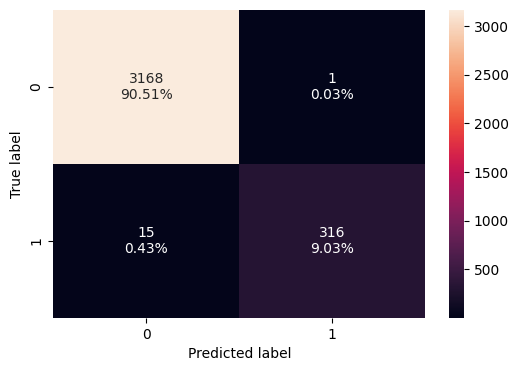

In [81]:
confusion_matrix_sklearn(dtree3, X_train_encoded, y_train)

In [85]:
dtree3_train_perf = model_performance_classification_sklearn(
    dtree3, X_train_encoded, y_train
)
dtree3_train_perf

Accuracy    Recall  Precision        F1
0  0.995429  0.954683   0.996845  0.975309

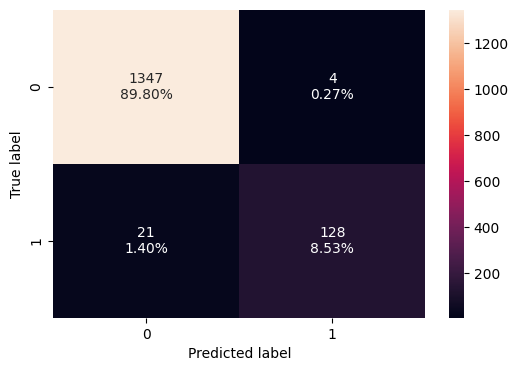

In [86]:
confusion_matrix_sklearn(dtree3, X_test_encoded, y_test)

In [87]:
dtree3_test_perf = model_performance_classification_sklearn(
    dtree3, X_test_encoded, y_test
)
dtree3_test_perf

Accuracy   Recall  Precision        F1
0  0.983333  0.85906   0.969697  0.911032

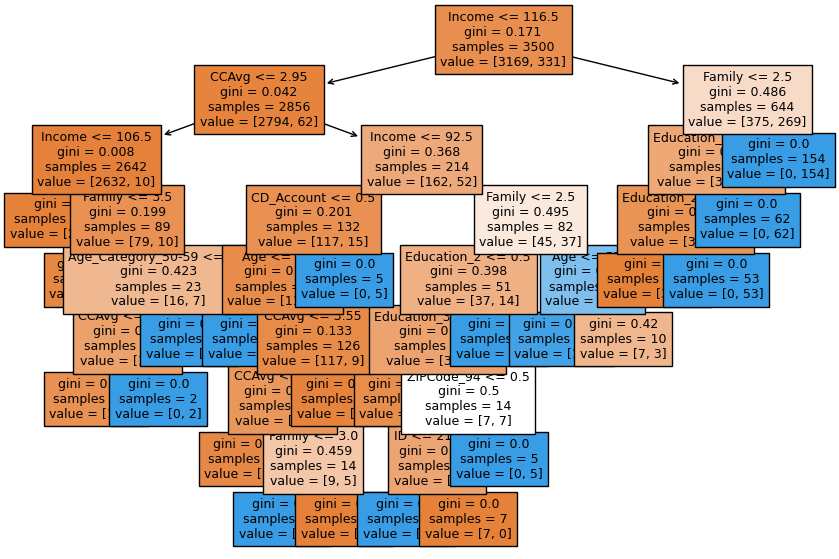

In [104]:
# list of feature names in X_train
feature_names = list(X_train_encoded.columns)

# set the figure size for the plot
plt.figure(figsize=(10, 7))

# plotting the decision tree
out = tree.plot_tree(
    dtree3,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

## Model Comparison and Final Model Selection

In [88]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree1_train_perf.T,
        dtree2_train_perf.T,
        dtree3_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree (sklearn default)  Decision Tree (Pre-Pruning)  \
Accuracy                               1.0                     0.984000   
Recall                                 1.0                     0.865772   
Precision                              1.0                     0.969925   
F1                                     1.0                     0.914894   

           Decision Tree (Post-Pruning)  
Accuracy                       0.995429  
Recall                         0.954683  
Precision                      0.996845  
F1                             0.975309

In [103]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        dtree1_test_perf.T,
        dtree2_test_perf.T,
        dtree3_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Decision Tree (sklearn default)  Decision Tree (Pre-Pruning)  \
Accuracy                          0.981333                     0.984000   
Recall                            0.892617                     0.865772   
Precision                         0.917241                     0.969925   
F1                                0.904762                     0.914894   

           Decision Tree (Post-Pruning)  
Accuracy                       0.983333  
Recall                         0.859060  
Precision                      0.969697  
F1                             0.911032

### im going for Pre-Pruning as it seems to be the best option as I want a balanced performance and want to avoid overfitting.

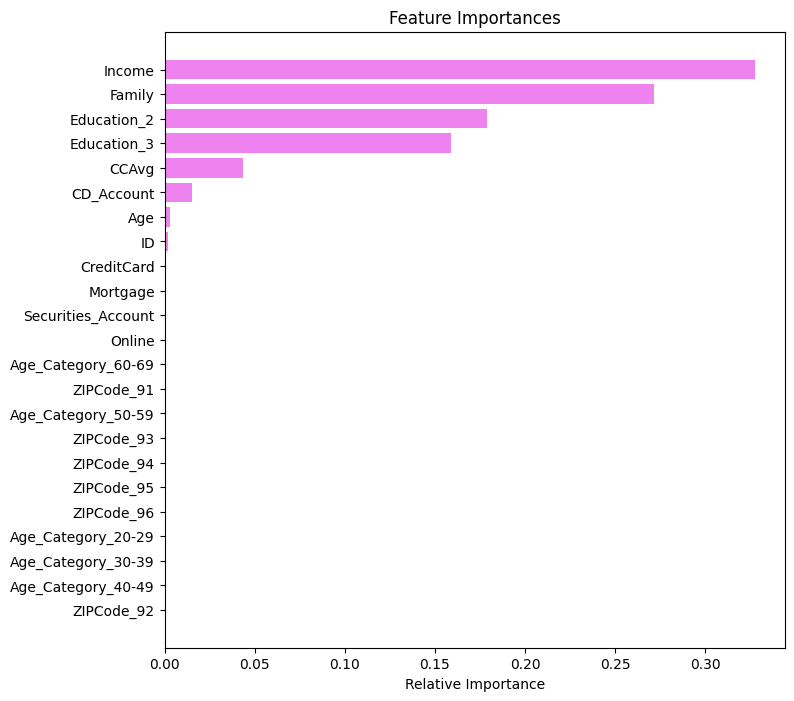

In [105]:
# importance of features in the tree building
importances = dtree2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

1 )Focus marketing on high-income individuals with offers tailored to their needs, like loans for investments or luxury purchases.

2 )Family-Focused Loan Products:
Create loan products with incentives, such as lower interest rates, specifically designed for larger families.

3 ) Education-Based Loan Offers:
Develop loan products for customers with higher education, targeting their needs for professional development or continuing education.

4 ) Cross-Sell to CD and Credit Card Holders:
Encourage CD account holders and active credit card users to take personal loans by offering bundled deals and loyalty rewards.

5) Customer Education Programs:
Offer educational webinars to help customers understand the benefits of personal loans, making them more likely to consider these products.

___